In [1]:
# Import Libaries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
book = pd.read_csv('book.csv')
book.head()


,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [3]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [4]:
book.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

(array([[1154.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          846.],
        [1505.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          495.],
        [1138.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          862.],
        [1436.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          564.],
        [1571.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          429.],
        [1518.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          482.],
        [1448.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          552.],
        [1773.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          227.],
        [1926.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           74.],
        [1903.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           97.],
        [1783.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          217.]]),
 array([0. , 0.1, 0

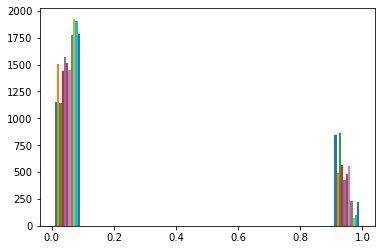

In [5]:
plt.hist(book)

array([[<AxesSubplot:title={'center':'ChildBks'}>,
        <AxesSubplot:title={'center':'YouthBks'}>,
        <AxesSubplot:title={'center':'CookBks'}>],
       [<AxesSubplot:title={'center':'DoItYBks'}>,
        <AxesSubplot:title={'center':'RefBks'}>,
        <AxesSubplot:title={'center':'ArtBks'}>],
       [<AxesSubplot:title={'center':'GeogBks'}>,
        <AxesSubplot:title={'center':'ItalCook'}>,
        <AxesSubplot:title={'center':'ItalAtlas'}>],
       [<AxesSubplot:title={'center':'ItalArt'}>,
        <AxesSubplot:title={'center':'Florence'}>, <AxesSubplot:>]],
      dtype=object)

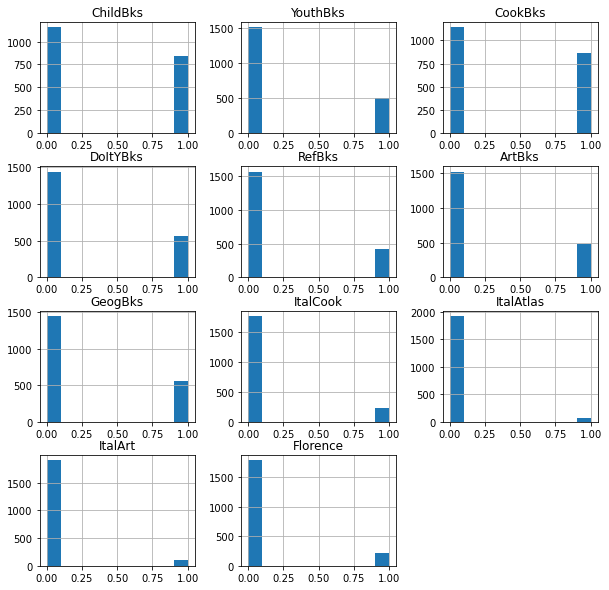

In [6]:
book.hist(figsize=(10,10))

<AxesSubplot:>

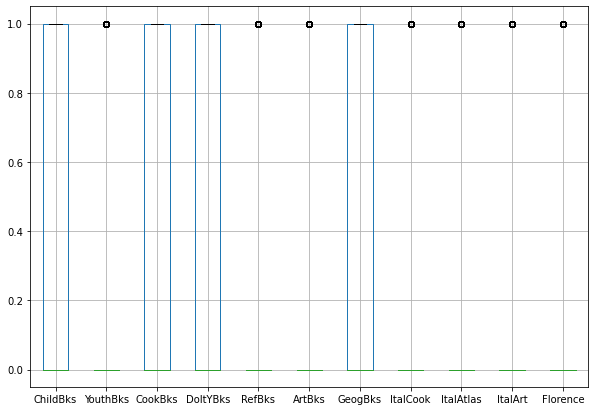

In [7]:
book.boxplot(figsize=(10,7))

# Apriori Algorithm

### Dataset with support=0.1, lift_therhold=0.8,confi_threshold=0.5

In [8]:
from apyori import apriori
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import pyforest


In [9]:
book_itemsets = apriori(book, min_support=0.1, use_colnames=True)
book_itemsets.head()

C:\ProgramData\Anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)


In [10]:
confi_rules = association_rules(book_itemsets, metric="confidence", min_threshold=0.5)
confi_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(CookBks),(ChildBks),0.4310,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
3,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548


In [11]:
rules = association_rules(book_itemsets, metric="lift", min_threshold=0.8)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.184,0.652482,1.542511,0.064714,1.660347


In [12]:
rules.sort_values('lift',ascending = False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
78,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
79,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
87,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
82,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
94,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
99,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>],
       [<AxesSubplot:title={'center':'lift'}>, <AxesSubplot:>]],
      dtype=object)

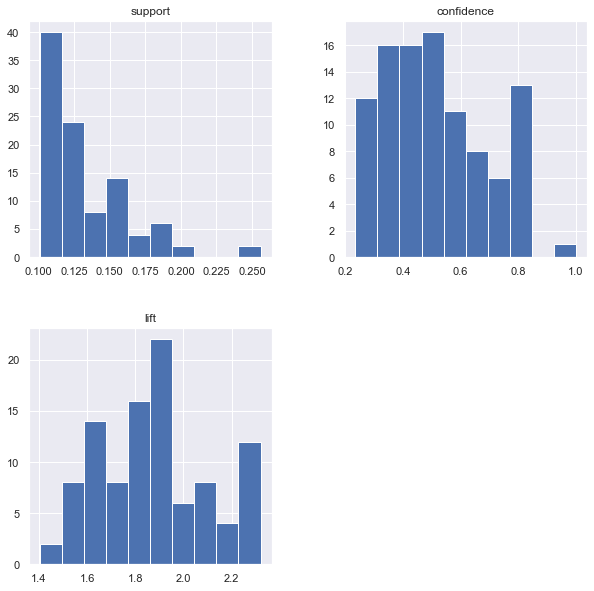

In [33]:
rules[['support','confidence', 'lift']].hist(figsize=(10,10))

In [13]:
r=rules[rules.lift>1]
r

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
97,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


In [14]:
lift=r.pivot('antecedents','consequents','lift')
lift.head()

consequents,(ChildBks),(YouthBks),"(DoItYBks, GeogBks)","(CookBks, GeogBks)","(GeogBks, ChildBks)","(CookBks, ArtBks)","(ChildBks, ArtBks)","(CookBks, RefBks)","(RefBks, ChildBks)","(CookBks, DoItYBks)",...,"(YouthBks, CookBks)","(CookBks, ChildBks)",(ItalCook),(GeogBks),(ArtBks),(RefBks),(DoItYBks),(CookBks),"(GeogBks, ArtBks)","(DoItYBks, ArtBks)"
antecedents,,,,,,,,,,,,,,,,,,,,,
(YouthBks),1.576044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.035985,NaN,1.764017,1.693281,NaN,1.654846,1.518667,NaN,NaN
(ChildBks),NaN,1.576044,1.864490,1.835989,NaN,1.790745,NaN,1.899004,NaN,1.84082,...,1.882497,NaN,NaN,1.670264,1.594028,1.669725,1.542511,1.404179,1.891253,NaN
(CookBks),1.404179,1.518667,1.899926,NaN,1.778809,NaN,1.806175,NaN,1.876058,NaN,...,NaN,NaN,2.320186,1.618245,1.607763,1.649549,1.542677,NaN,1.883445,1.906873
"(DoItYBks, GeogBks)",1.864490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.899926,NaN,NaN
"(GeogBks, ChildBks)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.170444,NaN,1.900346,1.778809,NaN,NaN


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\ProgramData\Anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\ProgramData\Anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0.5, 0, "frozenset({'ChildBks'})"),
  Text(1.5, 0, "frozenset({'YouthBks'})"),
  Text(2.5, 0, "frozenset({'DoItYBks', 'GeogBks'})"),
  Text(3.5, 0, "frozenset({'CookBks', 'GeogBks'})"),
  Text(4.5, 0, "frozenset({'GeogBks', 'ChildBks'})"),
  Text(5.5, 0, "frozenset({'CookBks', 'ArtBks'})"),
  Text(6.5, 0, "frozenset({'ChildBks', 'ArtBks'})"),
  Text(7.5, 0, "frozenset({'CookBks', 'RefBks'})"),
  Text(8.5, 0, "frozenset({'RefBks', 'ChildBks'})"),
  Text(9.5, 0, "frozenset({'CookBks', 'DoItYBks'})"),
  Text(10.5, 0, "frozenset({'DoItYBks', 'ChildBks'})"),
  Text(11.5, 0, "frozenset({'YouthBks', 'ChildBks'})"),
  Text(12.5, 0, "frozenset({'YouthBks', 'CookBks'})"),
  Text(13.5, 0, "frozenset({'CookBks', 'ChildBks'})"),
  Text(14.5, 0, "frozenset({'ItalCook'})"),
  Text(15.5, 0, "frozenset({'GeogBks'})"),
  Text(16.5, 0, "frozenset({'A

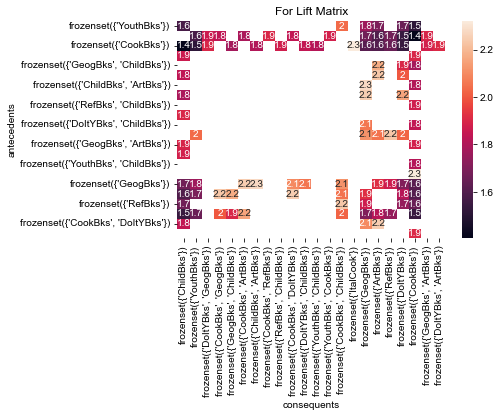

In [15]:
sns.heatmap(lift,annot = True)
sns.set(rc={'figure.figsize':(30,15)})
plt.title('For Lift Matrix')

plt.yticks(rotation=0)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'support vs confidence')

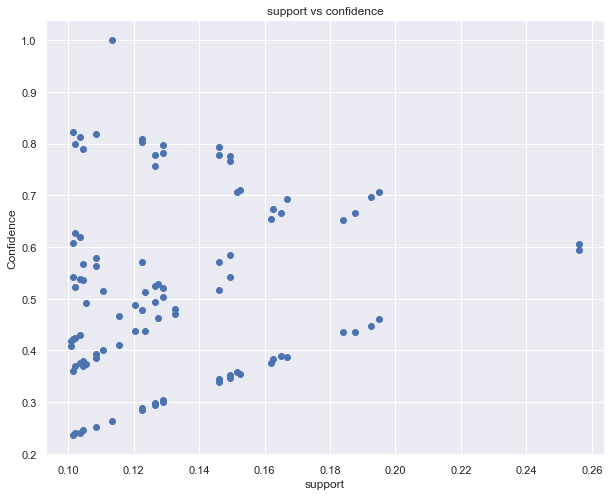

In [16]:
support=r['support']
confindenc=r['confidence']
plt.figure(figsize=(10,8))
plt.scatter(support,confindenc)
plt.xlabel('support')
plt.ylabel('Confidence')
plt.title('support vs confidence')

### Dataset with support=0.20, lift_therhold=0.8,confi_threshold=0.5

In [38]:
book_itemsets2 = apriori(book,min_support=0.20,use_colnames=True)
book_itemsets2

C:\ProgramData\Anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


## confi_rules_2 = association_rules(book_itemsets2, metric="confidence", min_threshold=0.5)


In [40]:
rules_2 = association_rules(book_itemsets2, metric="lift", min_threshold=0.8)
rules_2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


In [41]:
rules_2.sort_values('lift',ascending = False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>],
       [<AxesSubplot:title={'center':'lift'}>, <AxesSubplot:>]],
      dtype=object)

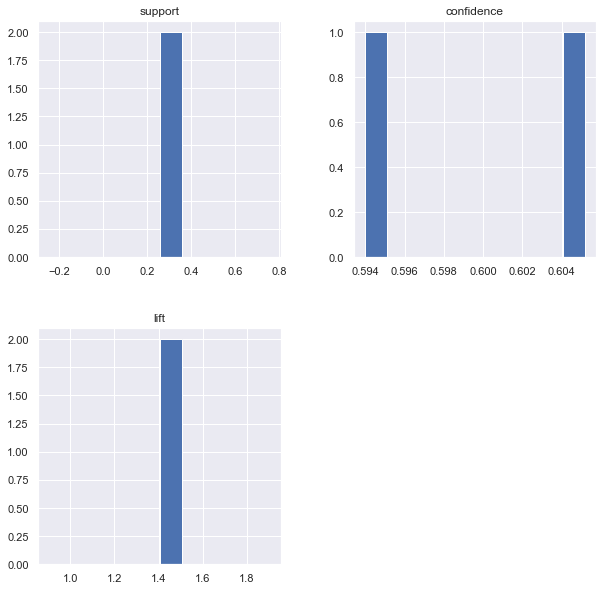

In [42]:
rules_2[['support','confidence', 'lift']].hist(figsize=(10,10))

In [21]:
lift_2=r.pivot('antecedents','consequents','lift')
lift_2.head()

consequents,(ChildBks),(YouthBks),"(DoItYBks, GeogBks)","(CookBks, GeogBks)","(GeogBks, ChildBks)","(CookBks, ArtBks)","(ChildBks, ArtBks)","(CookBks, RefBks)","(RefBks, ChildBks)","(CookBks, DoItYBks)",...,"(YouthBks, CookBks)","(CookBks, ChildBks)",(ItalCook),(GeogBks),(ArtBks),(RefBks),(DoItYBks),(CookBks),"(GeogBks, ArtBks)","(DoItYBks, ArtBks)"
antecedents,,,,,,,,,,,,,,,,,,,,,
(YouthBks),1.576044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.035985,NaN,1.764017,1.693281,NaN,1.654846,1.518667,NaN,NaN
(ChildBks),NaN,1.576044,1.864490,1.835989,NaN,1.790745,NaN,1.899004,NaN,1.84082,...,1.882497,NaN,NaN,1.670264,1.594028,1.669725,1.542511,1.404179,1.891253,NaN
(CookBks),1.404179,1.518667,1.899926,NaN,1.778809,NaN,1.806175,NaN,1.876058,NaN,...,NaN,NaN,2.320186,1.618245,1.607763,1.649549,1.542677,NaN,1.883445,1.906873
"(DoItYBks, GeogBks)",1.864490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.899926,NaN,NaN
"(GeogBks, ChildBks)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.170444,NaN,1.900346,1.778809,NaN,NaN


In [45]:
r_2=rules_2[rules_2.lift>0.1]
r_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:302: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:312: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = ax.figure.colorbar(mesh, cax, ax, **self.cbar_kws)


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\ProgramData\Anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0.5, 0, "frozenset({'ChildBks'})"),
  Text(1.5, 0, "frozenset({'YouthBks'})"),
  Text(2.5, 0, "frozenset({'DoItYBks', 'GeogBks'})"),
  Text(3.5, 0, "frozenset({'CookBks', 'GeogBks'})"),
  Text(4.5, 0, "frozenset({'GeogBks', 'ChildBks'})"),
  Text(5.5, 0, "frozenset({'CookBks', 'ArtBks'})"),
  Text(6.5, 0, "frozenset({'ChildBks', 'ArtBks'})"),
  Text(7.5, 0, "frozenset({'CookBks', 'RefBks'})"),
  Text(8.5, 0, "frozenset({'RefBks', 'ChildBks'})"),
  Text(9.5, 0, "frozenset({'CookBks', 'DoItYBks'})"),
  Text(10.5, 0, "frozenset({'DoItYBks', 'ChildBks'})"),
  Text(11.5, 0, "frozenset({'YouthBks', 'ChildBks'})"),
  Text(12.5, 0, "frozenset({'YouthBks', 'CookBks'})"),
  Text(13.5, 0, "frozenset({'CookBks', 'ChildBks'})"),
  Text(14.5, 0, "frozenset({'ItalCook'})"),
  Text(15.5, 0, "frozenset({'GeogBks'})"),
  Text(16.5, 0, "frozenset({'A

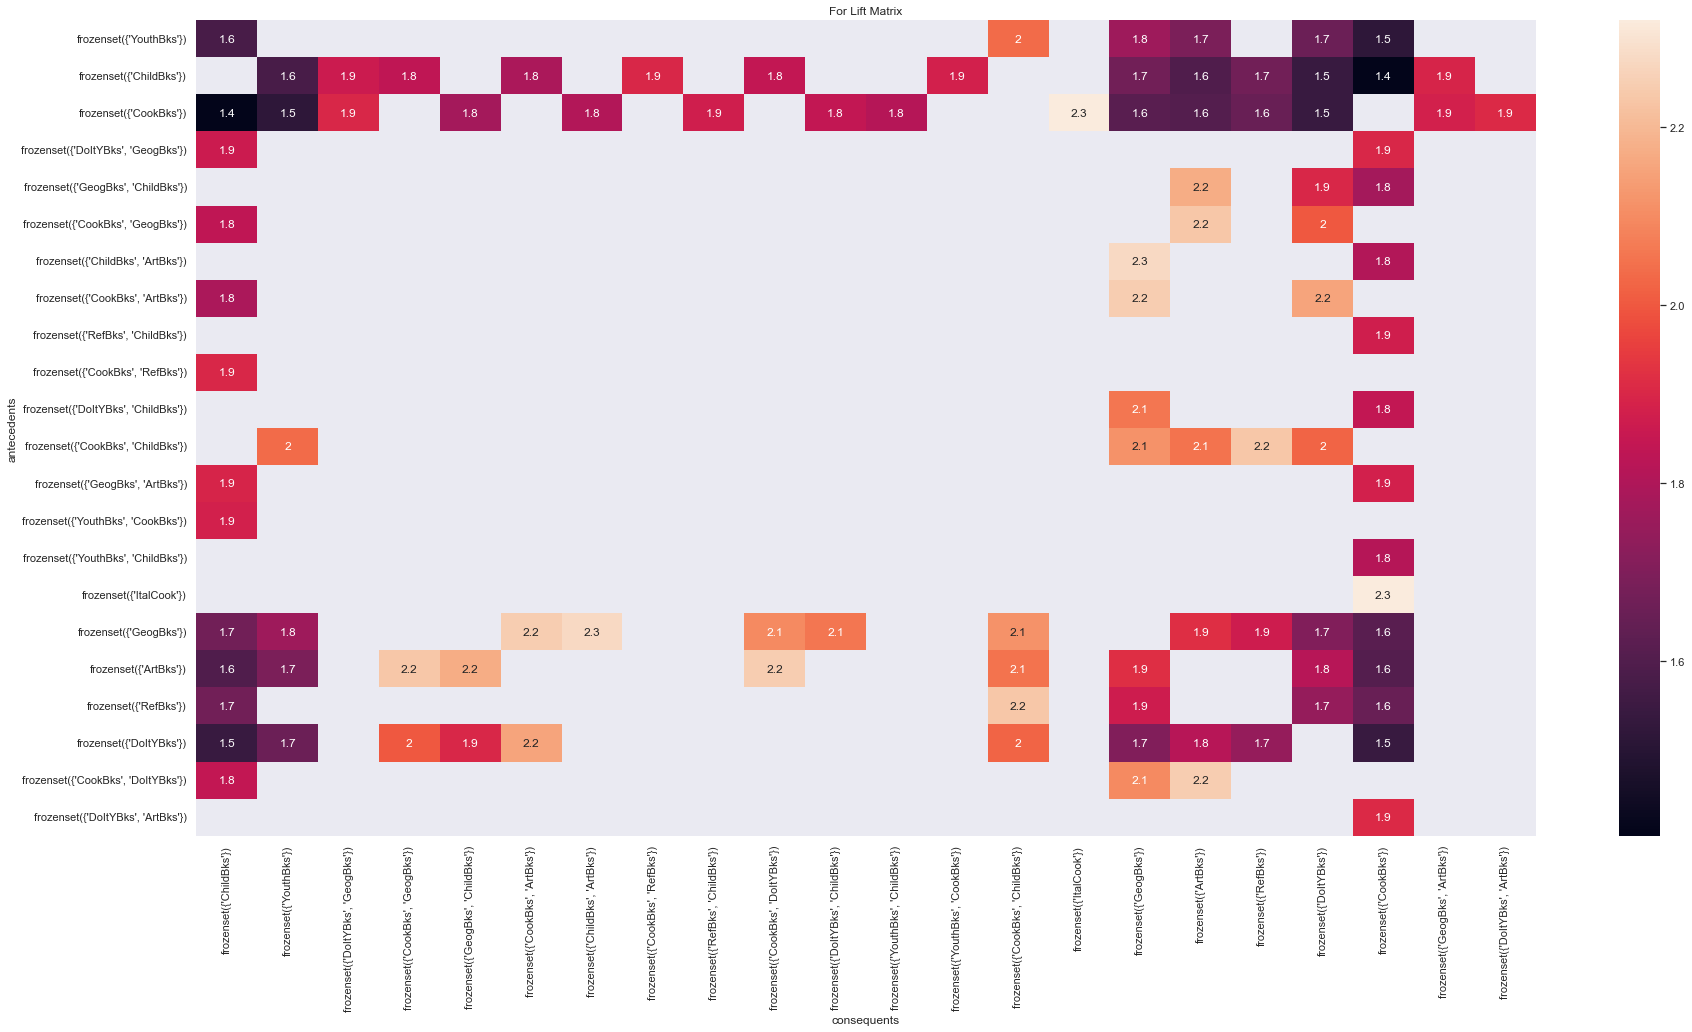

In [46]:
sns.heatmap(lift_2,annot = True)
sns.set(rc={'figure.figsize':(30,15)})
plt.title('For Lift Matrix')

plt.yticks(rotation=0)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'support vs confidence')

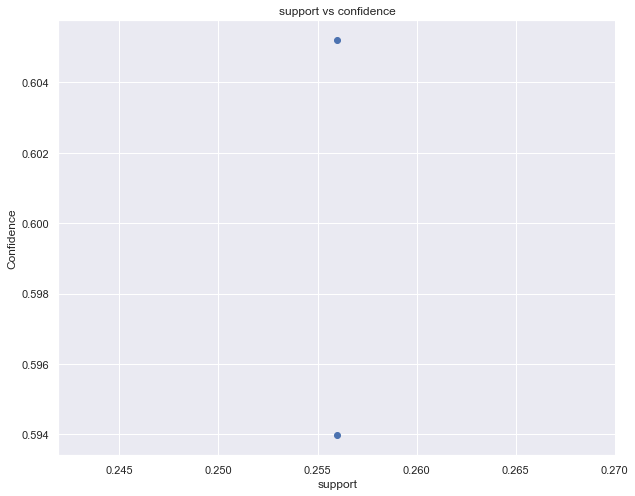

In [32]:
support=r_2['support']
confindenc=r_2['confidence']
plt.figure(figsize=(10,8))
plt.scatter(support,confindenc)
plt.xlabel('support')
plt.ylabel('Confidence')
plt.title('support vs confidence')

In [48]:
x = rules.loc[rules['lift'] > 2]
print(x.shape)
print(x)

(28, 9)
             antecedents           consequents  antecedent support  \
28             (CookBks)            (ItalCook)              0.4310   
29            (ItalCook)             (CookBks)              0.1135   
42   (CookBks, ChildBks)            (YouthBks)              0.2560   
43            (YouthBks)   (CookBks, ChildBks)              0.2475   
47   (CookBks, ChildBks)            (DoItYBks)              0.2560   
50            (DoItYBks)   (CookBks, ChildBks)              0.2820   
52   (CookBks, ChildBks)              (RefBks)              0.2560   
57              (RefBks)   (CookBks, ChildBks)              0.2145   
58   (CookBks, ChildBks)              (ArtBks)              0.2560   
63              (ArtBks)   (CookBks, ChildBks)              0.2410   
65   (CookBks, ChildBks)             (GeogBks)              0.2560   
68             (GeogBks)   (CookBks, ChildBks)              0.2760   
70  (DoItYBks, ChildBks)             (GeogBks)              0.1840   
75          

In [49]:
x.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,0.237054,0.237054,0.115286,0.511600,2.160903,0.061651,inf
std,0.058952,0.058952,0.016457,0.132658,0.096757,0.007621,NaN
min,0.113500,0.113500,0.101500,0.263341,2.022385,0.053716,1.203406
25%,0.191250,0.191250,0.102000,0.422718,2.057735,0.056313,1.401685
50%,0.244250,0.244250,0.106500,0.522145,2.162854,0.057279,1.559949
75%,0.276000,0.276000,0.126500,0.570508,2.245509,0.065640,1.686343
max,0.431000,0.431000,0.149500,1.000000,2.320186,0.078844,inf


In [50]:
x[['antecedents','consequents']]

,antecedents,consequents
28,(CookBks),(ItalCook)
29,(ItalCook),(CookBks)
42,"(CookBks, ChildBks)",(YouthBks)
43,(YouthBks),"(CookBks, ChildBks)"
47,"(CookBks, ChildBks)",(DoItYBks)
50,(DoItYBks),"(CookBks, ChildBks)"
52,"(CookBks, ChildBks)",(RefBks)
57,(RefBks),"(CookBks, ChildBks)"
58,"(CookBks, ChildBks)",(ArtBks)
63,(ArtBks),"(CookBks, ChildBks)"


# The End